# 원, 삼각형, 사각형 구분하기
## 구글 코랩에서 작업
## 3. Data Augmentation을 사용한 CNN 모델

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(5)

### 데이터 부풀리기(Augmentation)

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [0]:
!mkdir preview

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

In [0]:
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

# 무한 for loop이니 주의!!!
for batch in train_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break

### 데이터셋 생성하기

In [40]:
train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


### 모델 구성하기

In [41]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

### 모델 그래프로 보기

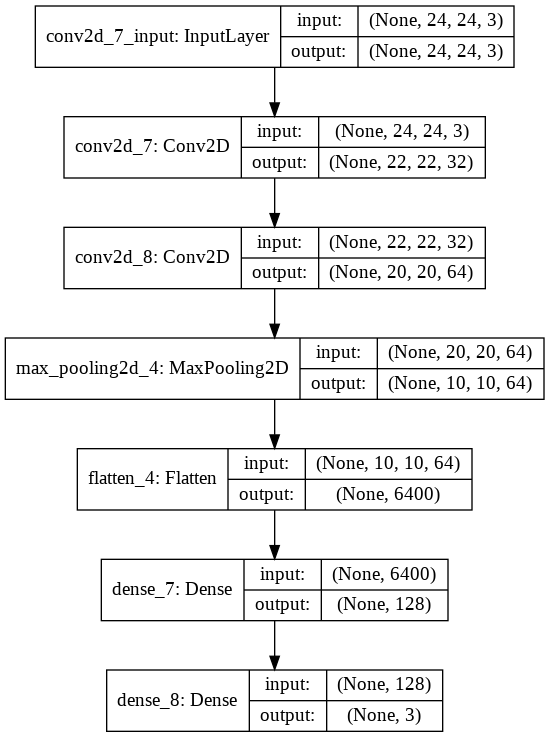

In [42]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'

### 모델 학습과정 설정하기

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 학습시키기
- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 train_generator으로 지정.
- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정.
- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정. 100번을 반복적으로 학습.
- validation_data : 검증데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 validation_generator으로 지정.
- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정.

In [44]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/200
15/15 [==============================] - 1s 55ms/step - loss: 1.2607 - acc: 0.3778 - val_loss: 1.0624 - val_acc: 0.6000
Epoch 2/200
15/15 [==============================] - 0s 25ms/step - loss: 1.0128 - acc: 0.4889 - val_loss: 1.0663 - val_acc: 0.3333
Epoch 3/200
15/15 [==============================] - 0s 23ms/step - loss: 0.8514 - acc: 0.5778 - val_loss: 1.0753 - val_acc: 0.5333
Epoch 4/200
15/15 [==============================] - 0s 28ms/step - loss: 0.7107 - acc: 0.6889 - val_loss: 1.1228 - val_acc: 0.6000
Epoch 5/200
15/15 [==============================] - 0s 29ms/step - loss: 0.6534 - acc: 0.7333 - val_loss: 1.3058 - val_acc: 0.5333
Epoch 6/200
15/15 [==============================] - 0s 28ms/step - loss: 0.6461 - acc: 0.7556 - val_loss: 1.0201 - val_acc: 0.5333
Epoch 7/200
15/15 [==============================] - 0s 30ms/step - loss: 0.6437 - acc: 0.6889 - val_loss: 1.4227 - val_acc: 0.4667
Epoch 8/200
15/15 [==============================] - 0s 27ms/step - loss: 0.

### 모델 평가하기

In [45]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 53.33%


### 모델 사용하기

In [46]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.000 1.000]
 [0.000 0.266 0.734]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.492 0.508]
 [0.004 0.000 0.996]
 [0.000 0.074 0.926]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]]
